In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Configuración para visualizaciones
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [ ]:
#Carga de datos
df = pd.read_csv("../stroke_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [15]:
# 1. Información general del dataset
print("Dimensiones del dataset:", df.shape)
print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

Dimensiones del dataset: (4981, 11)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB

Estadísticas descriptivas:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [18]:
# 2. Verificamos valores nulos
print("\nValores nulos por columna:")
display(df.isnull().sum())



Valores nulos por columna:


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Distribución de la variable stroke: stroke
0    4733
1     248
Name: count, dtype: int64
Porcentaje: stroke
0    95.02108
1     4.97892
Name: count, dtype: float64


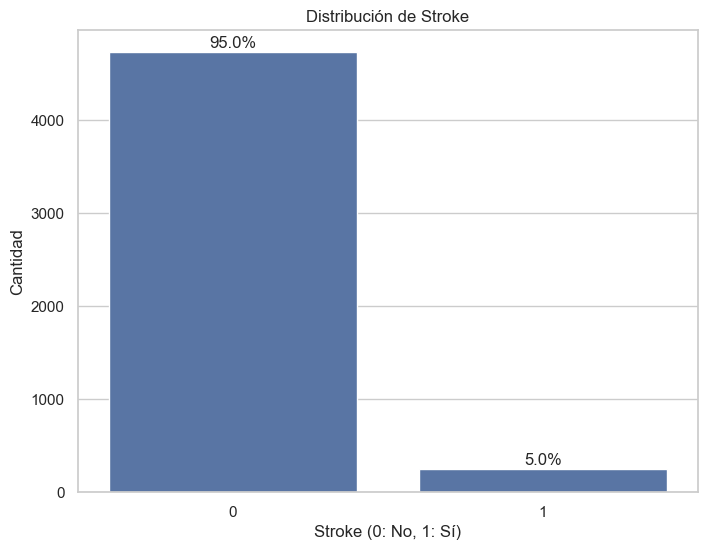

In [19]:
# Distribución de la variable objetivo (stroke)
stroke_counts = df['stroke'].value_counts()
print('Distribución de la variable stroke:', stroke_counts)
print('Porcentaje:', stroke_counts / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribución de Stroke')
plt.xlabel('Stroke (0: No, 1: Sí)')
plt.ylabel('Cantidad')

# Añadir etiquetas con porcentajes
total = len(df)
for i, count in enumerate(stroke_counts):
    plt.text(i, count + 50, f'{count/total*100:.1f}%', ha='center')
    
plt.show()

### Variables categóricas

Variables categóricas: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


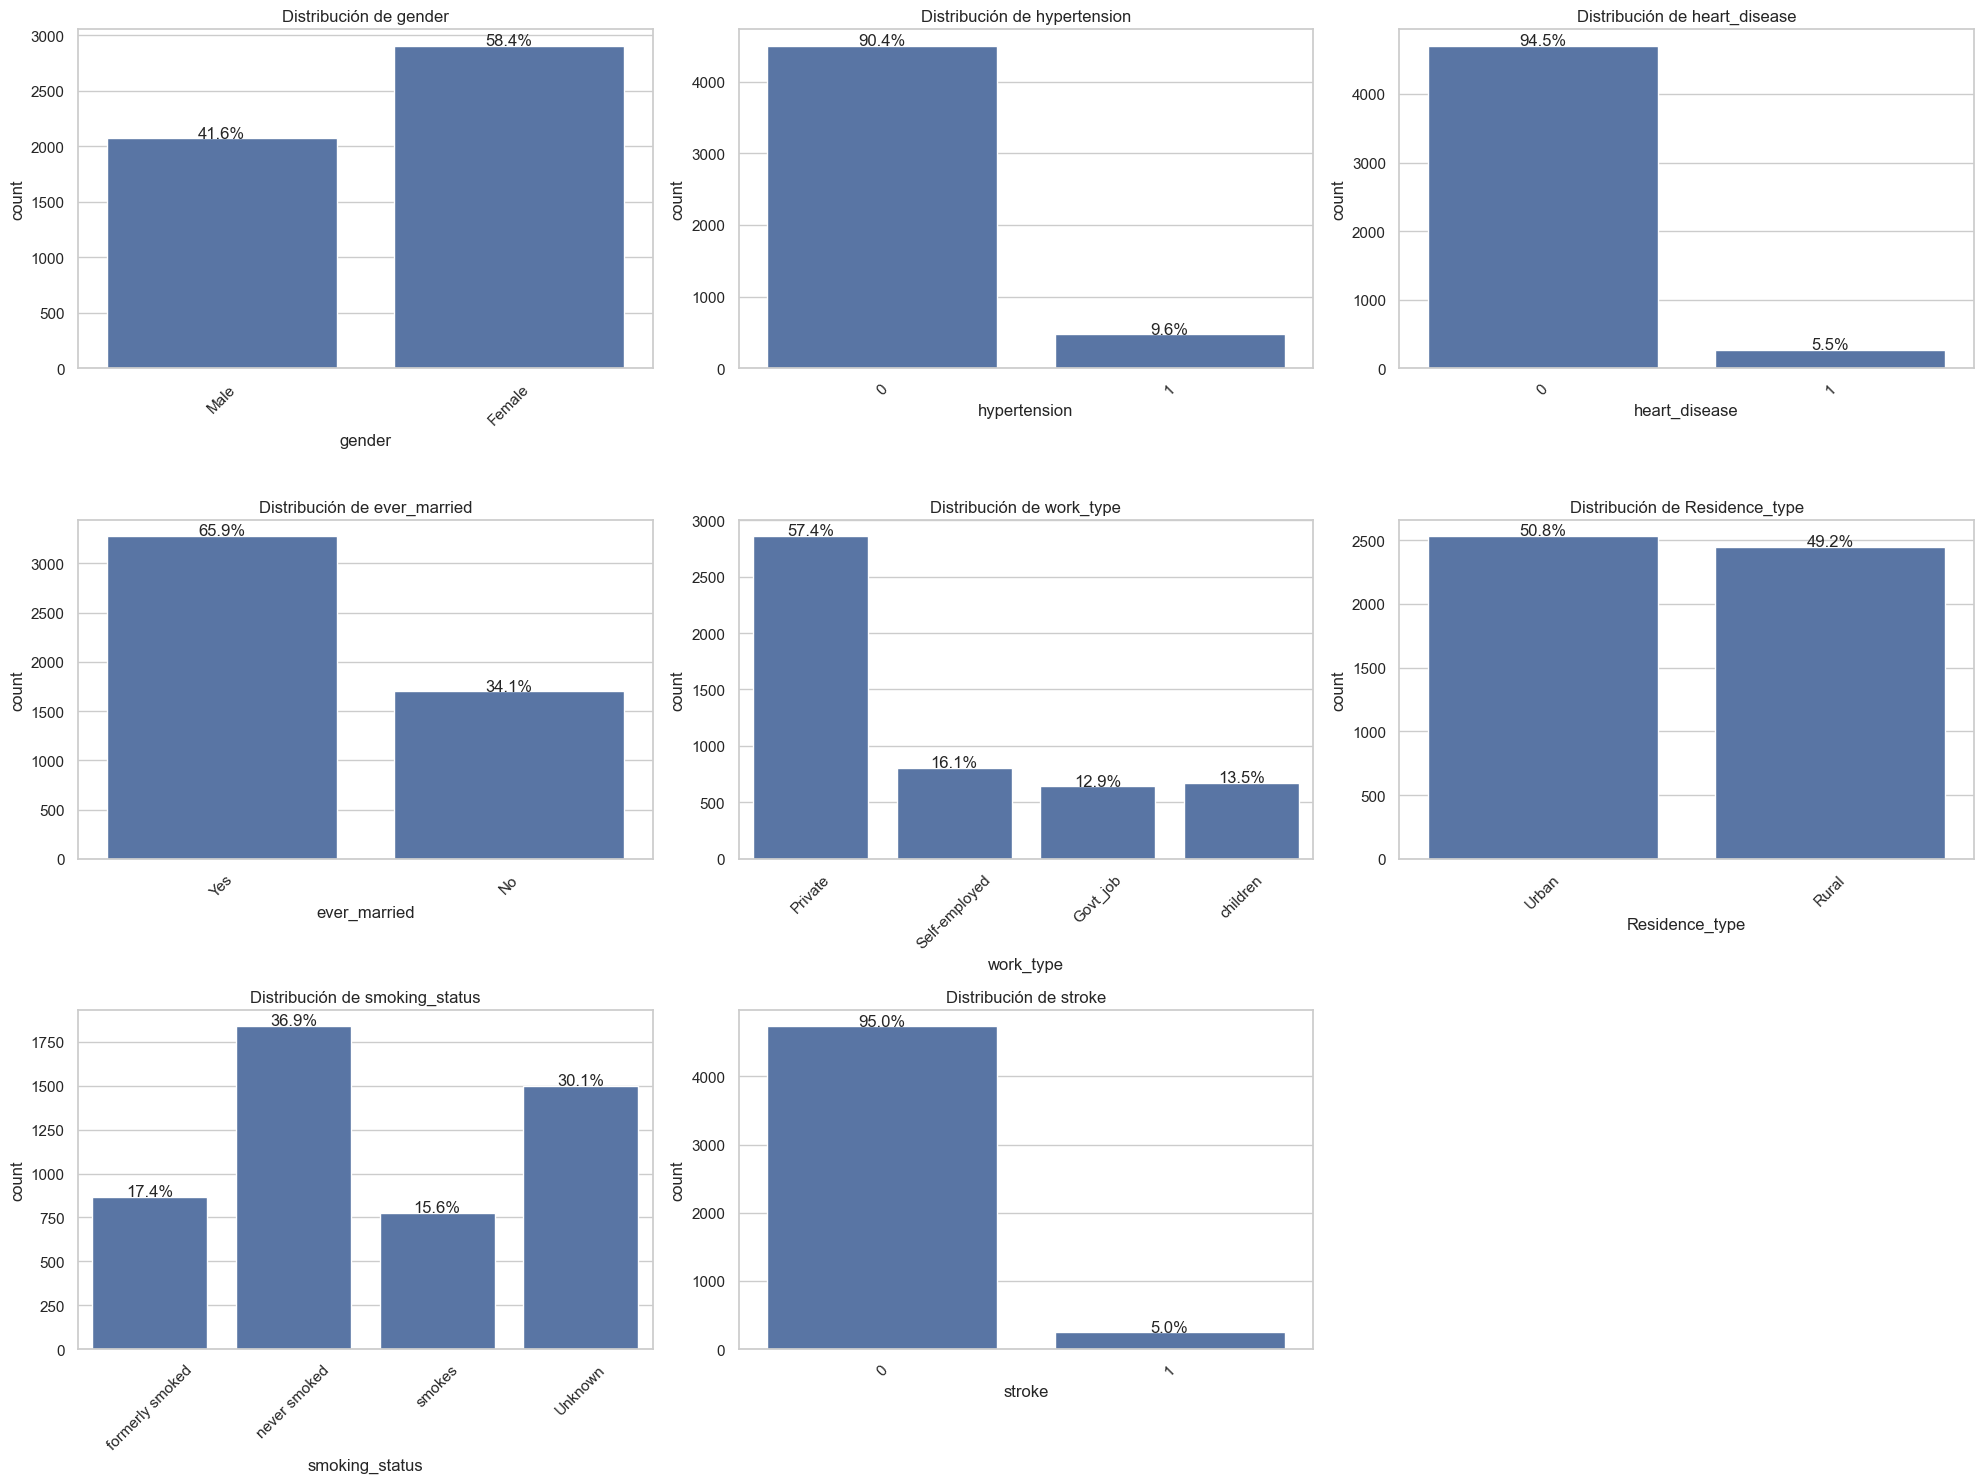

In [20]:
# Identificar variables categóricas
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' or col in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]

print('Variables categóricas:', categorical_cols)

# Crear gráficos para cada variable categórica
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    
    # Añadir etiquetas con porcentajes
    total = len(df)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width()/2., height + 5, f'{height/total*100:.1f}%', ha='center')

plt.tight_layout()
plt.show()

### Variables numéricas

Variables numéricas: ['age', 'avg_glucose_level', 'bmi']


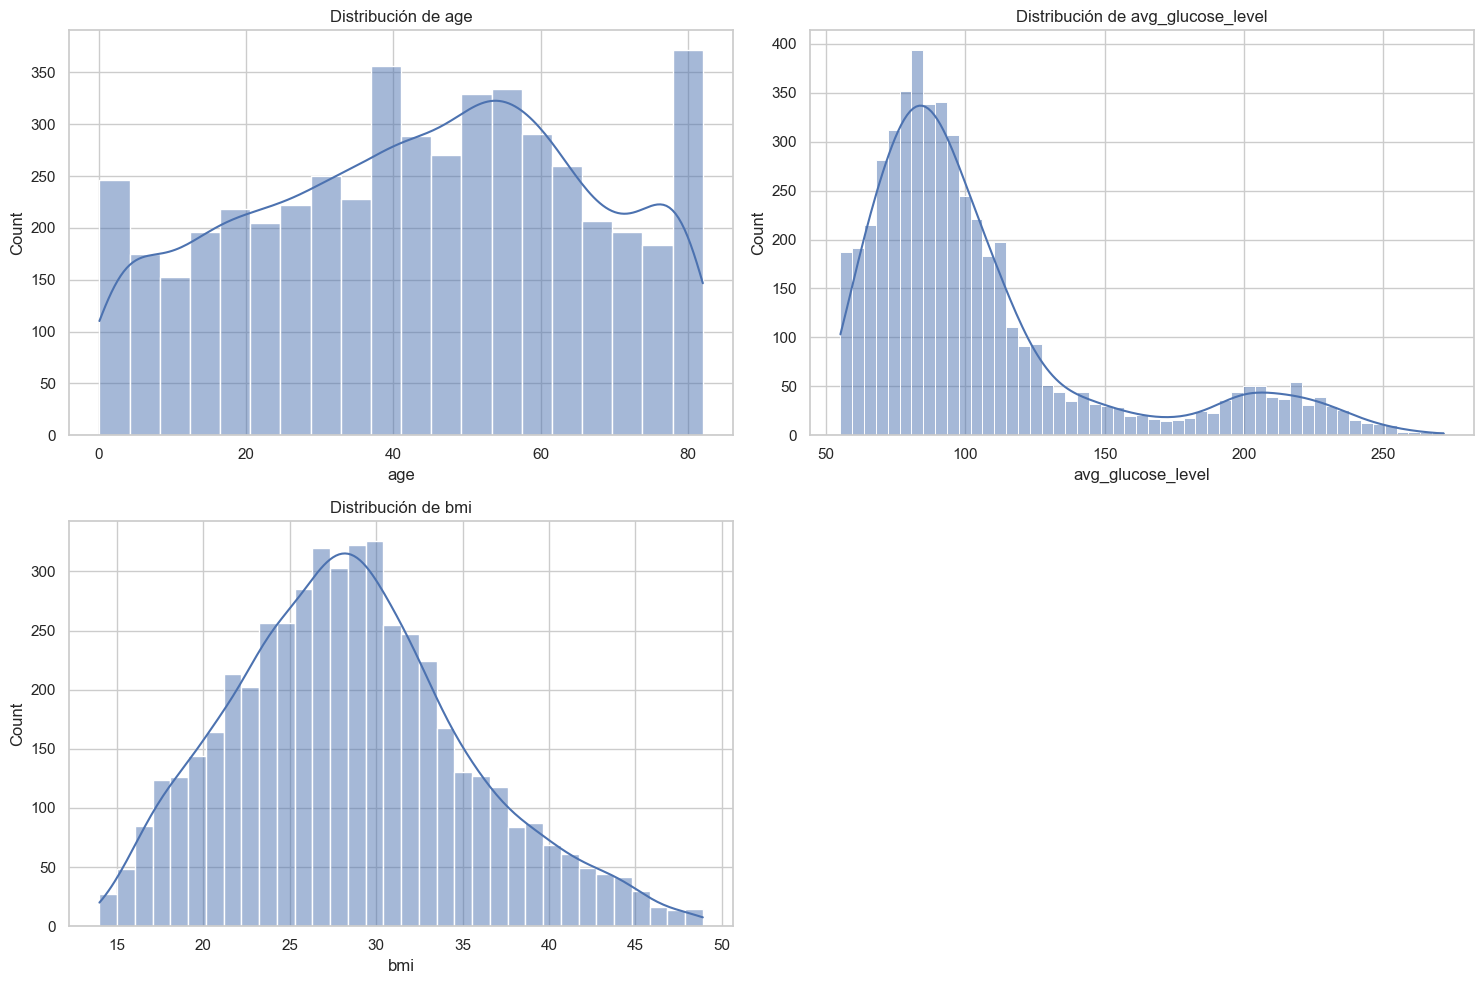

In [21]:
# Identificar variables numéricas
numerical_cols = [col for col in df.columns if df[col].dtype != 'object' and col not in ['hypertension', 'heart_disease', 'stroke']]

print('Variables numéricas:', numerical_cols)

# Crear histogramas para cada variable numérica
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

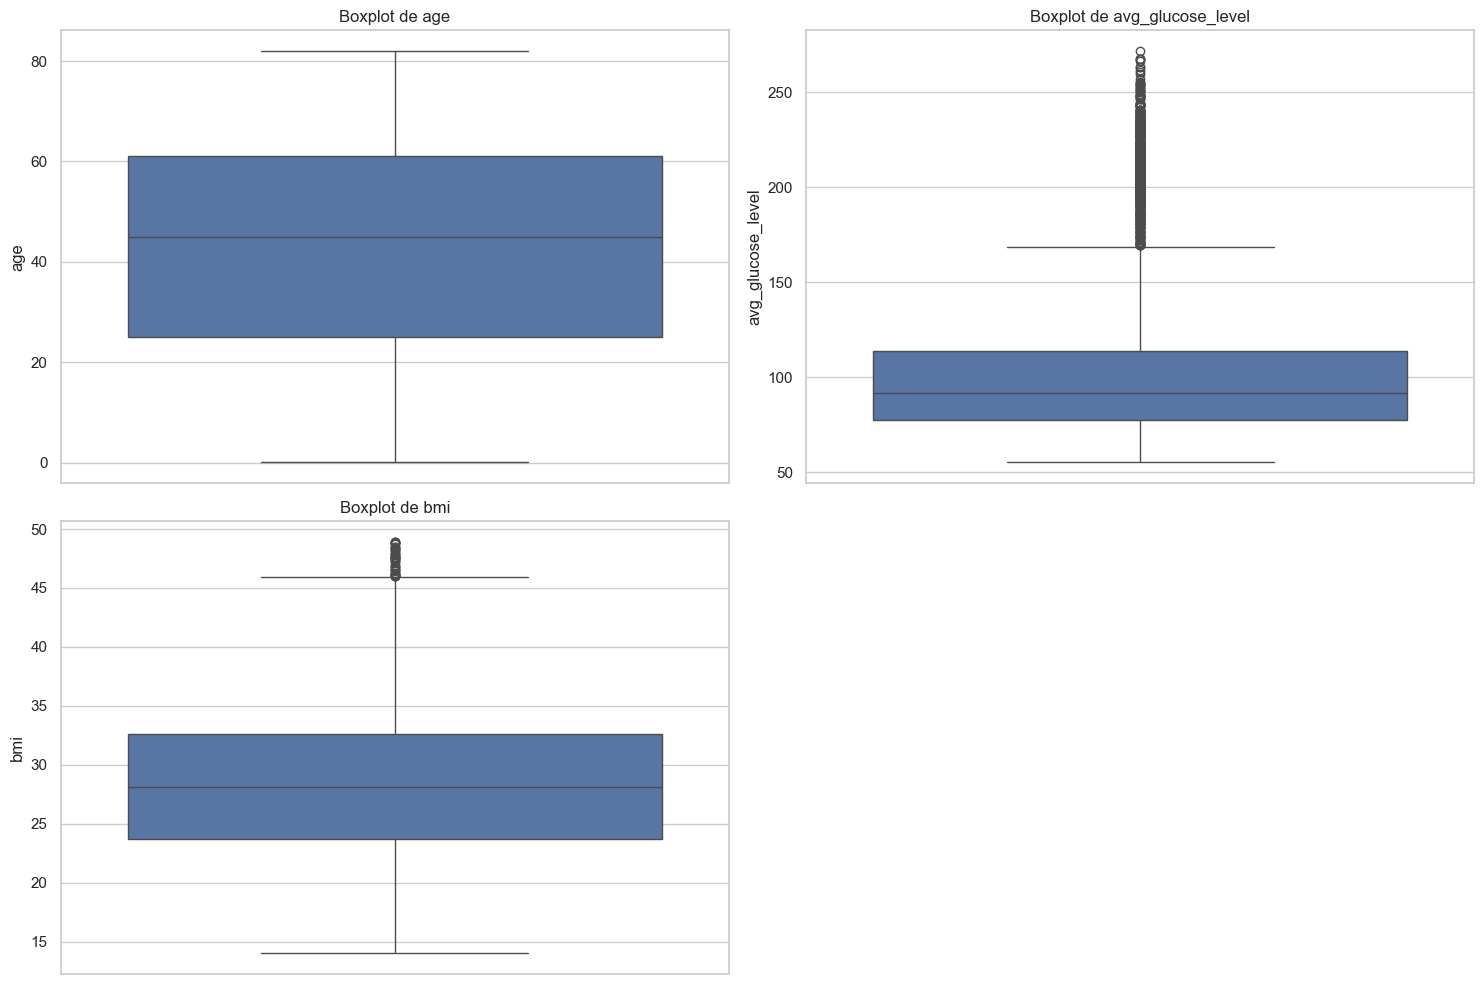

In [22]:
# Boxplots para detectar outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

## Análisis bivariante

### Variables categóricas vs Stroke


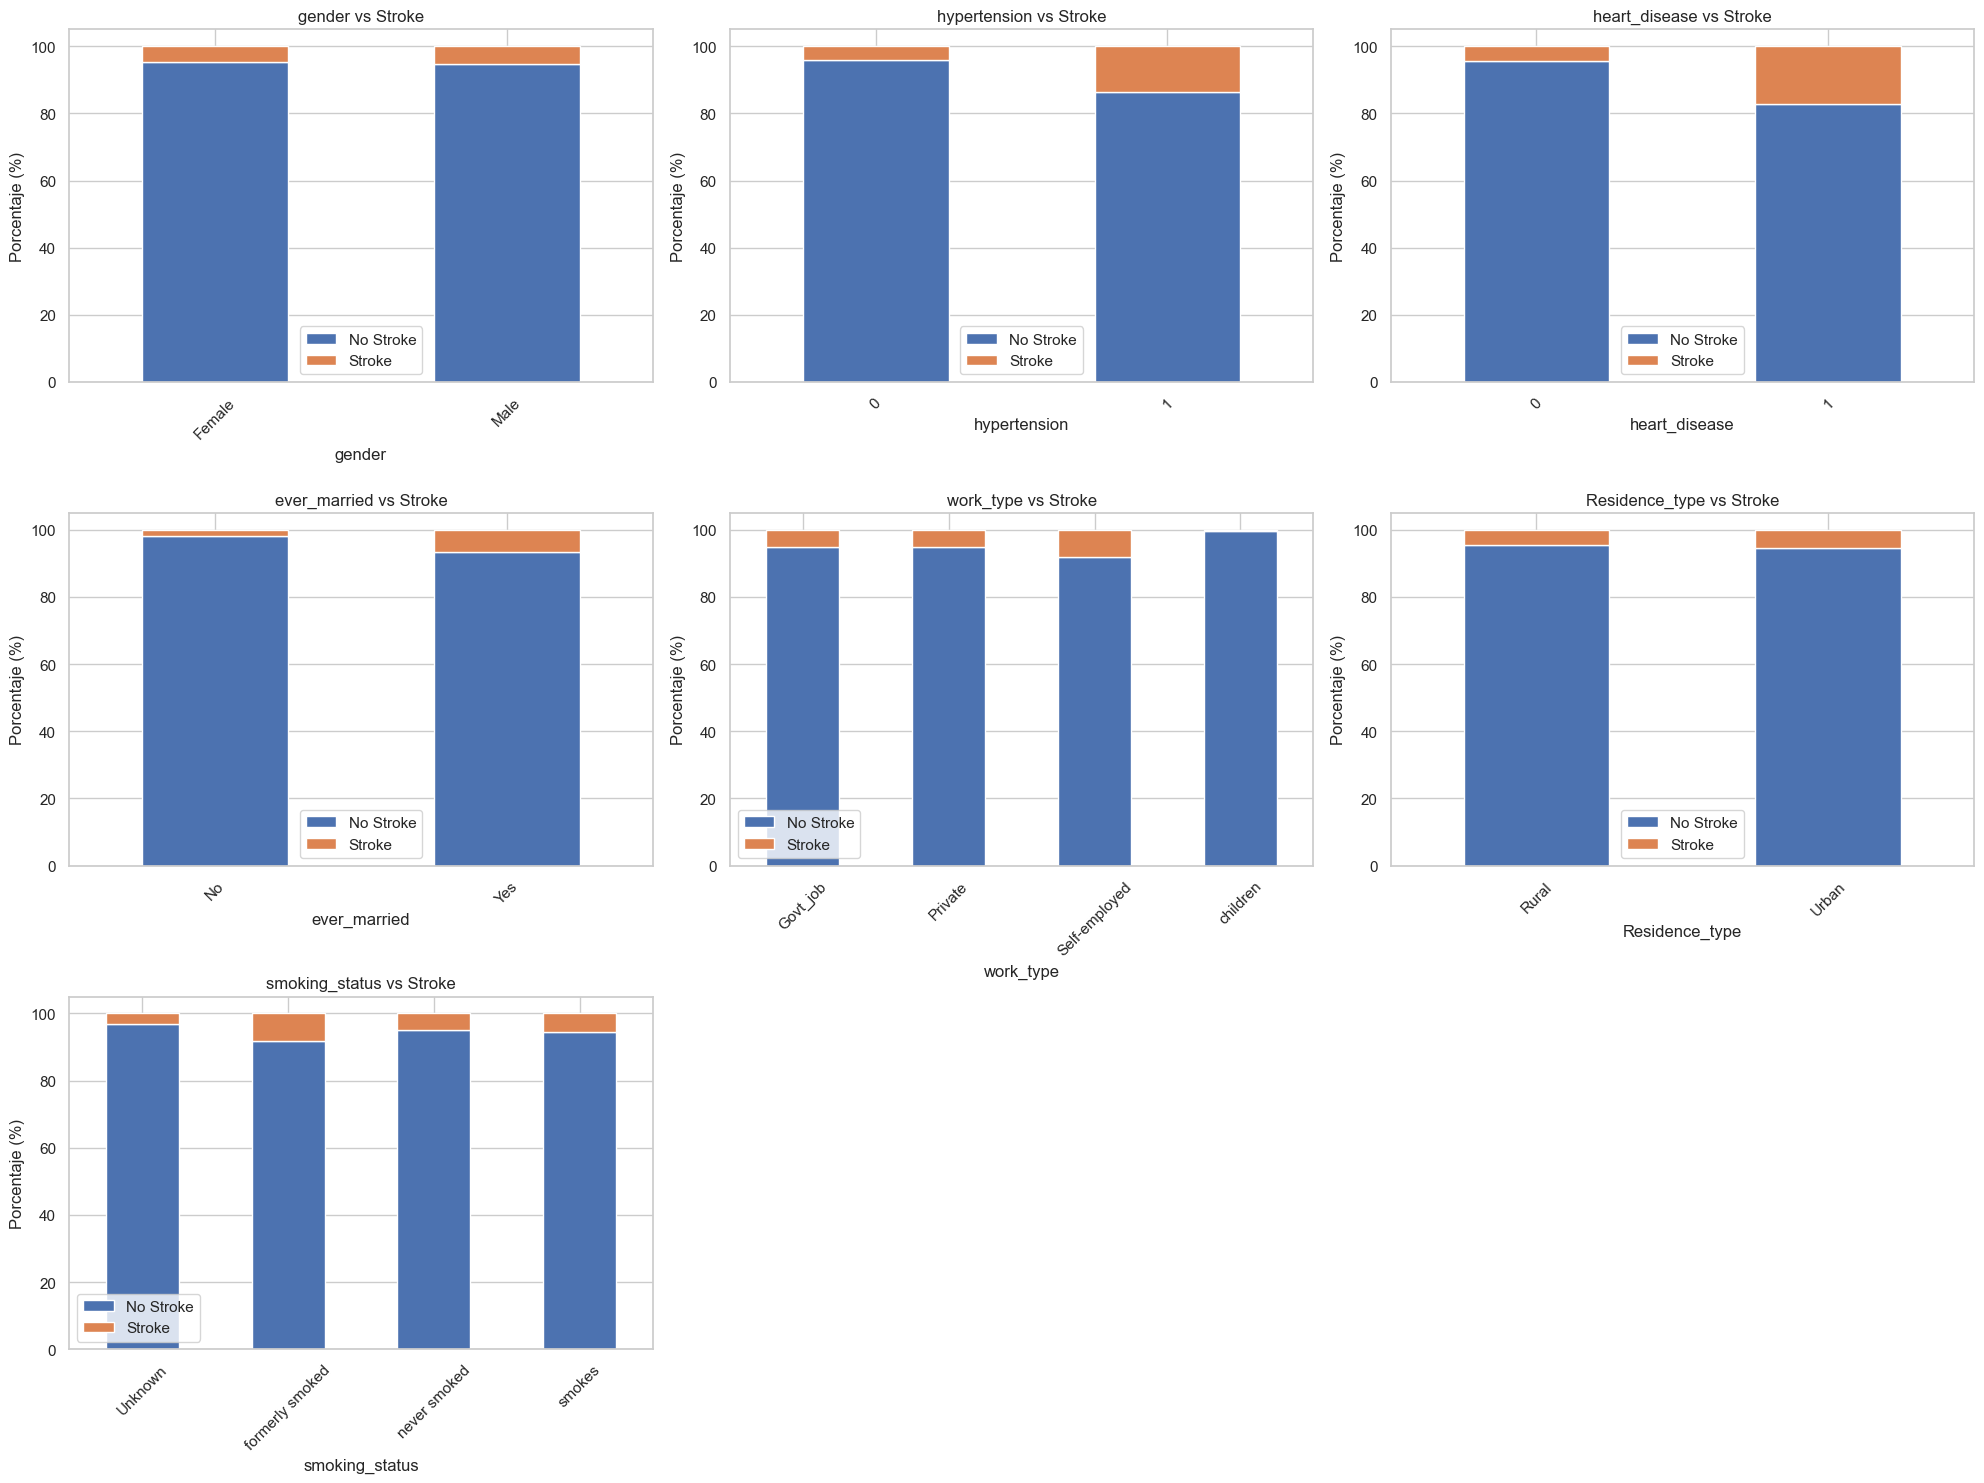

In [23]:
# Relación entre variables categóricas y stroke
plt.figure(figsize=(20, 15))

categorical_cols_no_stroke = [col for col in categorical_cols if col != 'stroke']

for i, col in enumerate(categorical_cols_no_stroke, 1):
    plt.subplot(3, 3, i)
    
    # Crear tabla de contingencia y calcular porcentajes
    ct = pd.crosstab(df[col], df['stroke'])
    ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
    
    # Graficar
    ct_pct.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{col} vs Stroke')
    plt.xlabel(col)
    plt.ylabel('Porcentaje (%)')
    plt.legend(['No Stroke', 'Stroke'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Variables numéricas vs Stroke

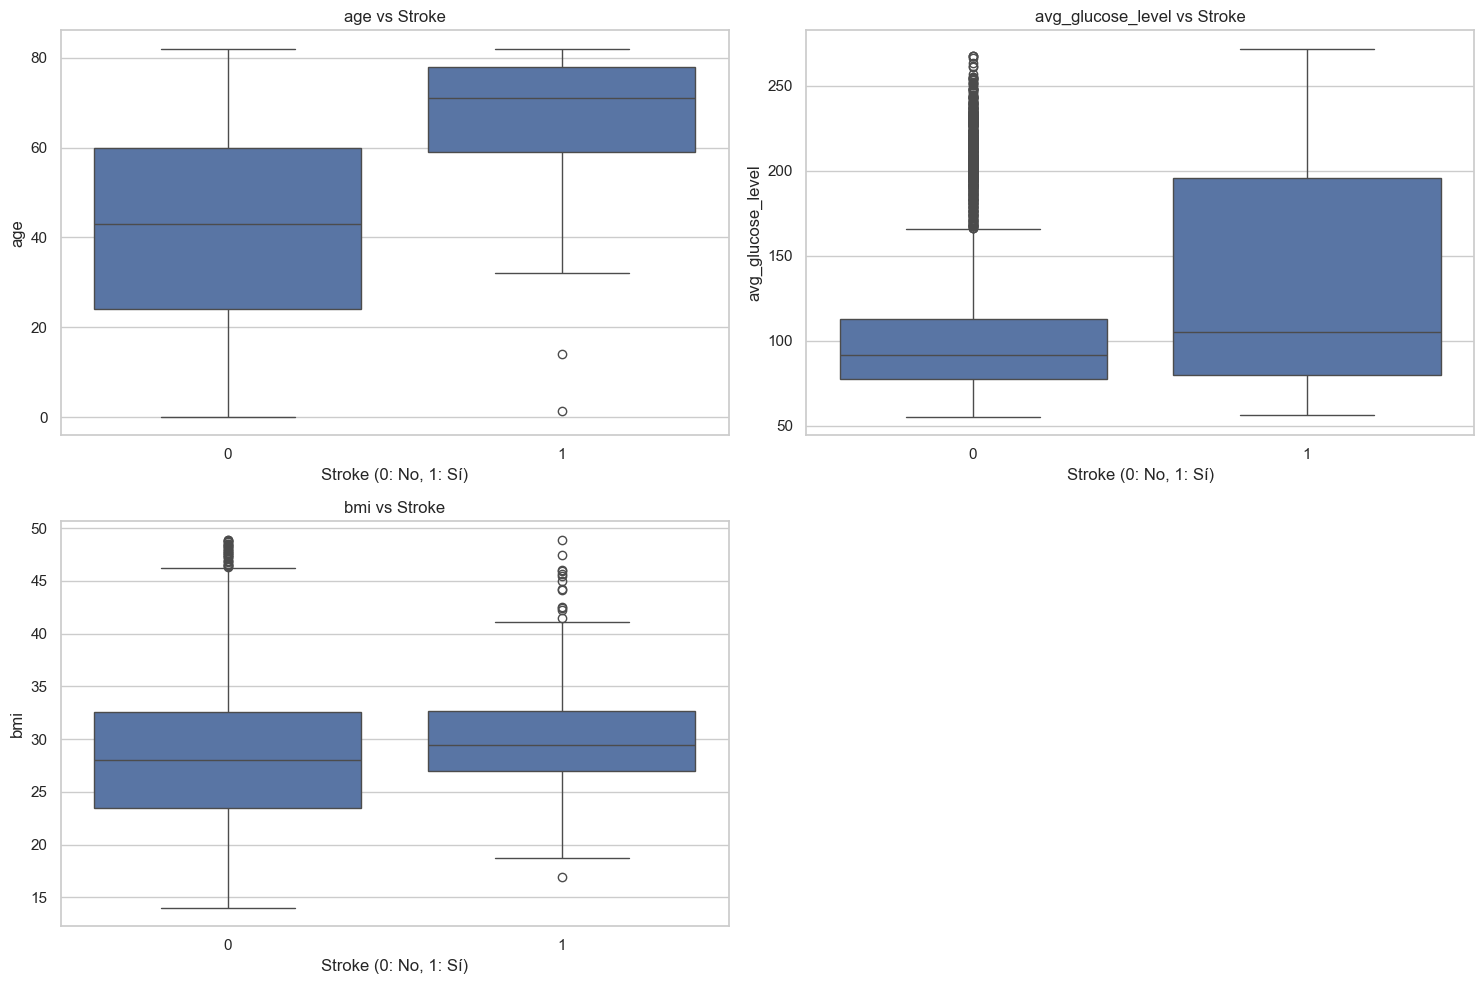

In [24]:
# Relación entre variables numéricas y stroke
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'{col} vs Stroke')
    plt.xlabel('Stroke (0: No, 1: Sí)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

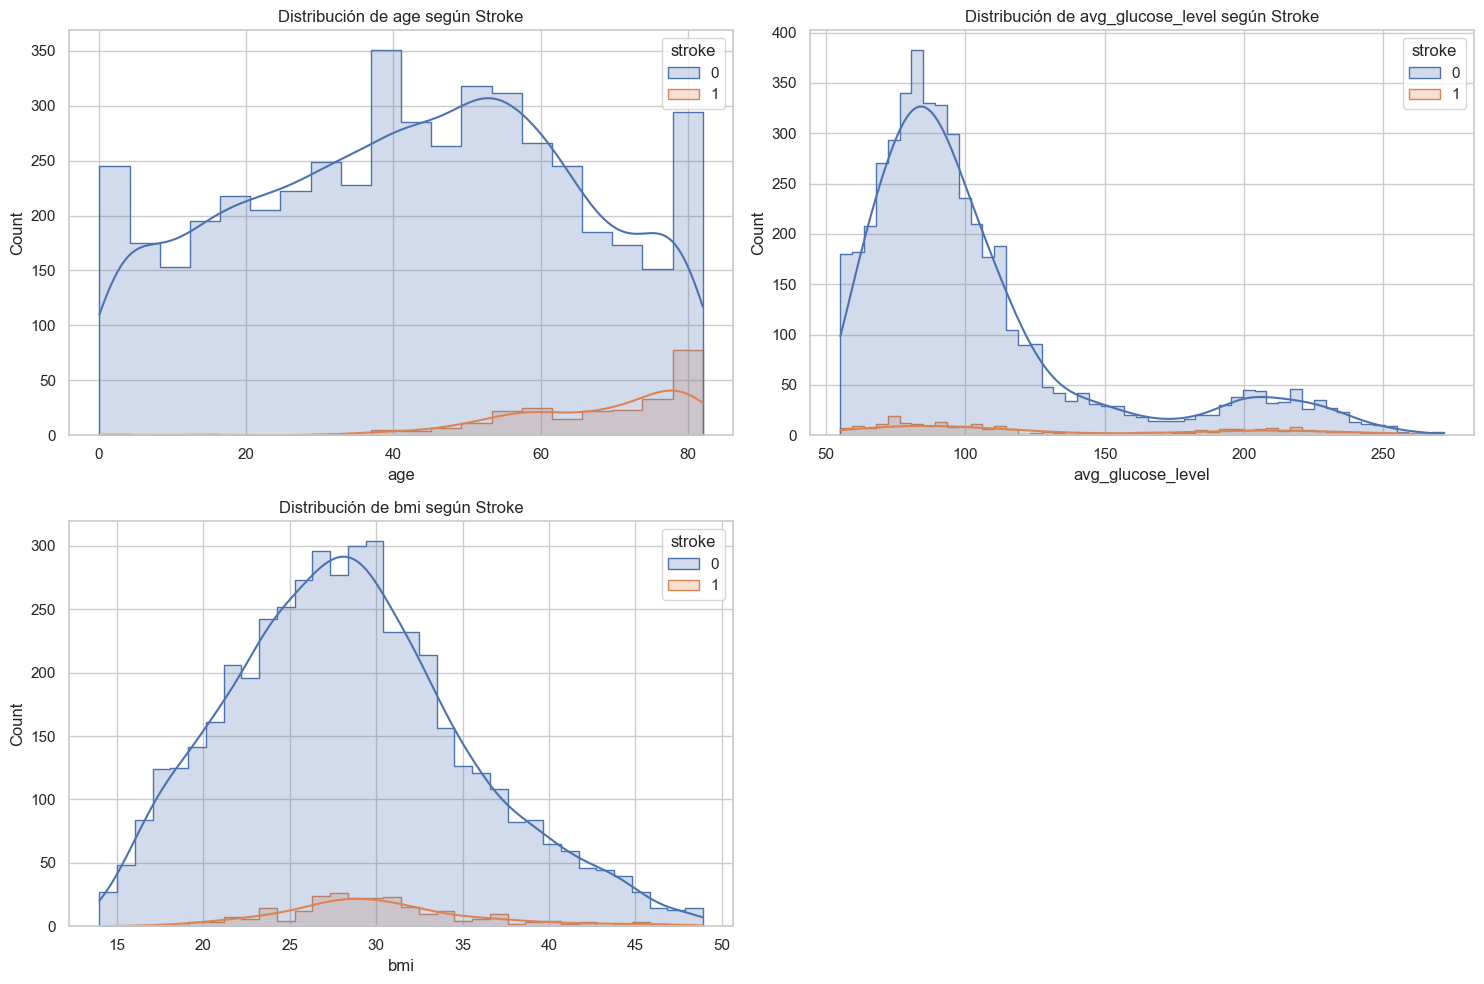

In [25]:
# Distribución de variables numéricas según stroke
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue='stroke', kde=True, element='step', common_norm=False)
    plt.title(f'Distribución de {col} según Stroke')

plt.tight_layout()
plt.show()

## Correlaciones

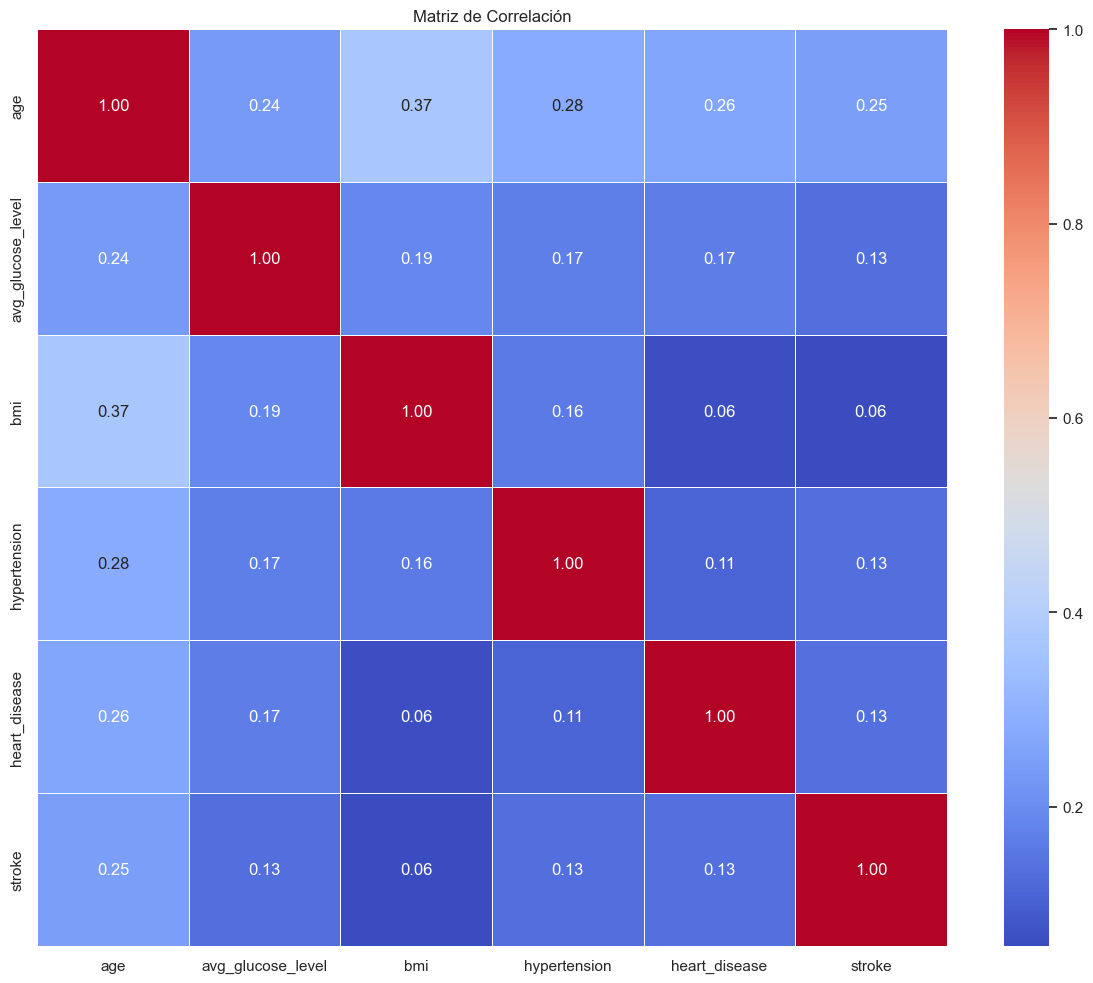

In [26]:
# Crear un dataframe con variables numéricas y binarias
corr_df = df[numerical_cols + ['hypertension', 'heart_disease', 'stroke']]

# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

## Conclusiones

Basado en el análisis exploratorio, podemos extraer las siguientes conclusiones:

1. **Desbalance de clases**: El dataset presenta un fuerte desbalance en la variable objetivo 'stroke', con una proporción mucho mayor de casos negativos (no stroke) que positivos.

2. **Factores de riesgo**: Variables como la edad, hipertensión, enfermedad cardíaca y nivel de glucosa muestran relaciones importantes con la probabilidad de stroke.

3. **Correlaciones**: La edad muestra una correlación positiva con la probabilidad de stroke, así como con hipertensión y enfermedad cardíaca.

4. **Distribuciones**: Las distribuciones de variables como BMI y nivel de glucosa presentan asimetrías y valores atípicos que podrían requerir transformaciones para análisis posteriores.

5. **Próximos pasos**: Para un modelo predictivo, sería recomendable:
   - Abordar el desbalance de clases (técnicas de sobremuestreo o submuestreo)
   - Tratar valores atípicos en variables numéricas
   - Codificar adecuadamente las variables categóricas
   - Evaluar la importancia de características